Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy: 0.9956571505521142
Precision: 0.9956601145908425
Recall: 0.9956571505521142
F1-score: 0.9956569130716695
Confusion Matrix:
 [[14170    84]
 [   45 15405]]


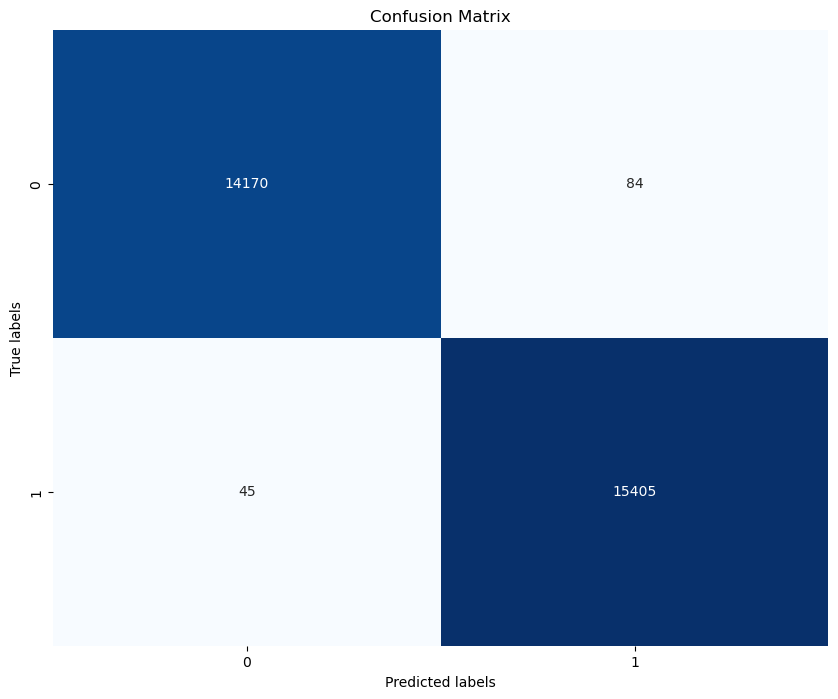

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the TRAIN dataset 
data = pd.read_csv("C:/Users/Sujan Tumbaraguddi/Downloads/archive/Train.csv") 

# Separate features (features) and target variable (target)
features = data.drop(['attack_class'], axis=1)  
target = data['attack_class']

# Encoding categorical features
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    features_encoded = pd.get_dummies(features, columns=categorical_cols)
else:
    features_encoded = features

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Encoding the target variable
label_encoder = LabelEncoder()
target_encoded_train = label_encoder.fit_transform(y_train)

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a Random Forest classifier
clf = RandomForestClassifier(random_state=22)

# Grid search using cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, target_encoded_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to predict on the test set
y_pred_encoded = grid_search.predict(X_test)

# Inverse transforming the predictions to get back the original string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
